# TFM: algoritmos no supervisados

In [1]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Leemos el catálogo con el que vamos a trabajar

In [2]:
cat = fits.open('ANF40pau_PAUS-COSMOS-radec-narrow-fluxes-err.fits')

In [3]:
#cat.info()

In [4]:
#cat[1].columns

In [5]:
tab = Table(cat[1].data)

In [6]:
#tab

Solo me interesan algunas columnas, convierto la tabla a pandas y filtro.

In [7]:
DF = tab.to_pandas()
#list(DF)

Columnas de interés con sus errores

In [8]:
Tab = DF[['ref_id','ra', 'dec', 'zspec', 'photoz','type', 'u_cfht', 'B_Subaru', 'V_Subaru', 'r_Subaru', 'i_Subaru', 'suprime_FDCCD_z', 'Y_uv', 'J_uv','H_uv','K_uv','err_u_cfht', 'err_B_Subaru', 'err_V_Subaru', 'err_r_Subaru', 'err_i_Subaru', 'err_suprime_FDCCD_z', 'err_Y_uv', 'err_J_uv','err_H_uv','err_K_uv']]
#Tab

Una vez filtrada la tabla (**el DataFrame de trabajo bueno es Tab**) con las columnas que queremos

Tengo que añadir algunas columnas de interés, y manipular los datos.

- Columnas de color: con colores. *V-J*, *U-V*, *u-r*, *r-K*.
  **Importante, tenemos los flujos, de manera que los colores van como el cociente de los flujos**, mirar la ecuación de Pogson de más abajo.
  
   
- Normalizar los flujos: con la 'norma' del 'vector filtros' 

- Hemos añadido también colores entre cada par de filtros consecutivos.

In [9]:
#cociente flujos
Tab['u/V'] = Tab['u_cfht']/Tab['V_Subaru']
Tab['V/J'] = Tab['V_Subaru']/Tab['J_uv']
Tab['u/r'] = Tab['u_cfht']/Tab['r_Subaru']
Tab['r/K'] = Tab['r_Subaru']/Tab['K_uv']
Tab['B/r'] = Tab['B_Subaru']/Tab['r_Subaru']
#colores los plots del paper
Tab['V-J'] = -2.5*np.log10(Tab['V/J'])
Tab['u-V'] = -2.5*np.log10(Tab['u/V'])
Tab['r-K'] = -2.5*np.log10(Tab['r/K'])
Tab['u-r'] = -2.5*np.log10(Tab['u/r'])
#magnitudes 
filtros = ['u_cfht', 'B_Subaru', 'V_Subaru', 'r_Subaru', 'i_Subaru', 'suprime_FDCCD_z', 'Y_uv', 'J_uv','H_uv','K_uv']
magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']

for i in range(len(filtros)):
    Tab[magnitudes[i]]=-48.6-2.5*np.log10(Tab[filtros[i]])
    
#colores con filtros consecutivos
#basta con hacer la resta de las columnas magnitudes consecutivamente
colores = ['u-B', 'B-V', 'V-r', 'r-i', 'i-z', 'z-Y', 'Y-J', 'J-H', 'H-K'] #9 elementos
for i in range(len(colores)): #esto itera de 0 a 8 (9elementos)
    Tab[colores[i]] = Tab[magnitudes[i]]-Tab[magnitudes[i+1]]

C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\2188853330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab['u/V'] = Tab['u_cfht']/Tab['V_Subaru']
C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\2188853330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab['V/J'] = Tab['V_Subaru']/Tab['J_uv']
C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\2188853330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\2188853330.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab[colores[i]] = Tab[magnitudes[i]]-Tab[magnitudes[i+1]]
C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\2188853330.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab[colores[i]] = Tab[magnitudes[i]]-Tab[magnitudes[i+1]]
C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\2188853330.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [10]:
Tab[magnitudes].min()

m_u_cfht             17.650202
m_B_Subaru           17.025174
m_V_Subaru           16.643069
m_r_Subaru           16.426507
m_i_Subaru           16.182235
m_suprime_FDCCD_z    16.039991
m_Y_uv               15.877995
m_J_uv               15.661285
m_H_uv               15.486278
m_K_uv               15.619924
dtype: float64

In [11]:
Tab[magnitudes].max()

m_u_cfht             28.506570
m_B_Subaru           26.713948
m_V_Subaru           25.298922
m_r_Subaru           25.036866
m_i_Subaru           24.338653
m_suprime_FDCCD_z    24.014418
m_Y_uv               23.774516
m_J_uv               23.877717
m_H_uv               23.390228
m_K_uv               23.451218
dtype: float64

### Normalizar flujos

In [12]:
#Primero genero cuatro listas con los nombres de las columnas los flujos, sus errores, y los mismos normalizados
filtros = ['u_cfht', 'B_Subaru', 'V_Subaru', 'r_Subaru', 'i_Subaru', 'suprime_FDCCD_z', 'Y_uv', 'J_uv','H_uv','K_uv']
errfiltros = ['err_u_cfht', 'err_B_Subaru', 'err_V_Subaru', 'err_r_Subaru', 'err_i_Subaru', 'err_suprime_FDCCD_z', 'err_Y_uv', 'err_J_uv','err_H_uv','err_K_uv']
nerrfiltros = ['nerr_u_cfht', 'nerr_B_Subaru', 'nerr_V_Subaru', 'nerr_r_Subaru', 'nerr_i_Subaru', 'nerr_suprime_FDCCD_z', 'nerr_Y_uv', 'nerr_J_uv','nerr_H_uv','nerr_K_uv']
nfiltros = ['n_u_cfht', 'n_B_Subaru', 'n_V_Subaru', 'n_r_Subaru', 'n_i_Subaru', 'n_suprime_FDCCD_z', 'n_Y_uv', 'n_J_uv','n_H_uv','n_K_uv']

m=Tab[filtros]**2 #Tab[filtros]**2 es un df con las columnas de los filtros al cuadrado, se lo asigno a m
#m.sum(axis=1) devuelve la suma de las columnas de cada fila del df m. De manera que m.sum(axis=1)[0] p.ej. es la suma de
#la primera fila, esto es: el módulo^2 de los filtros de la primera fila.
Tab['módulo_filtros']=np.sqrt(m.sum(axis=1))#añado nueva columna con el módulo de filtros de cada galaxia.
for i in range(len(filtros)):
    Tab[nfiltros[i]] = Tab[filtros[i]]/Tab['módulo_filtros']
    Tab[nerrfiltros[i]] = Tab[errfiltros[i]]/Tab['módulo_filtros']   
    
#Normalizar errores es algo que hay que pensar 2 veces pero hecho está.
#colist=list(Tab) asigna a la variable colist una lista con los encabezados de las columnas, no me hace falta ahora

C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\2390807918.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab['módulo_filtros']=np.sqrt(m.sum(axis=1))#añado nueva columna con el módulo de filtros de cada galaxia.
C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\2390807918.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab[nfiltros[i]] = Tab[filtros[i]]/Tab['módulo_filtros']
C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\2390807918.py:13: SettingWithCopyWarning: 
A value is trying to be 

## Componentes principales
calcular las componentes ppales a partir de las magnitudes

después hacer plot de densidad, y plot con las varibles que sean y colores de catálogo.

Después correr otro algoritmo de clasificación

In [13]:
magnitudes

['m_u_cfht',
 'm_B_Subaru',
 'm_V_Subaru',
 'm_r_Subaru',
 'm_i_Subaru',
 'm_suprime_FDCCD_z',
 'm_Y_uv',
 'm_J_uv',
 'm_H_uv',
 'm_K_uv']

In [14]:
Tab[magnitudes]

m_u_cfht  m_B_Subaru  m_V_Subaru  m_r_Subaru  m_i_Subaru  \
0      22.928679   22.324074   21.713651   20.990942   20.325008   
1      21.811980   20.885876   19.549214   19.122280   18.602434   
2      22.707770   22.761947   22.681971   22.364661   21.787727   
3      21.711525   21.585085   20.998429   20.771962   20.650277   
4      24.191150   24.137852   23.785692   23.349074   22.407606   
...          ...         ...         ...         ...         ...   
12108  22.148709   22.001913   21.335046   21.039228   20.881345   
12109  22.482160   22.352510   21.729849   21.412600   21.186612   
12110  23.836356   23.820151   23.572623   23.373692   22.730631   
12111  23.895685   24.078303   23.922817   23.720273   23.060157   
12112  22.907815   22.570726   21.931798   21.660254   21.524985   

       m_suprime_FDCCD_z     m_Y_uv     m_J_uv     m_H_uv     m_K_uv  
0              19.918392  19.727191  19.467156  19.042987  18.796103  
1              18.294497  18.089135  17.752083  17.516818  17.399786  
2              22.383147  21.867179  22.220564  22.102670  22.297836  
3              20.436990  20.435621  20.283513  20.191344  20.090657  
4              21.875217  21.666035  21.305032  20.999595  20.705534  
...                  ...        ...        ...        ...        ...  
12108          20.655862  20.627623  20.455734  20.329540  20.242919  
12109          20.927324  20.911642  20.699974  20.477303  20.347146  
12110          22.434747  22.323557  22.007195  22.010798  21.778409  
12111          22.676771  22.648711  22.238681  22.265945  22.241645  
12112          21.345017  21.452580  21.289092  21.199364  21.120305  

[12113 rows x 10 columns]

In [15]:
M=Tab[magnitudes]
S=M.to_numpy()
cov_mat = np.cov(S.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
#  Hacemos una lista de parejas (autovector, autovalor)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# Ordenamos estas parejas den orden descendiente con la funcion sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('varianza explicada:',var_exp)
print('varianza explicada acumulada',cum_var_exp)
#Generamos la matriz a partir de los pares autovalor-autovector
#matrix_w = np.hstack((eig_pairs[0][1].reshape(10,1),
                     # eig_pairs[1][1].reshape(10,1)))
#print('Matriz W:\n', matrix_w)
#'''
#matrix_w = eig_vecs[:2].transpose()
#print('Matriz W:\n', matrix_w)
#'''
#P = S.dot(matrix_w)
P=np.zeros((len(Tab), len(magnitudes)), dtype='double')
for i in range(len(Tab)):  #numero de galaxias
    for j in range(len(magnitudes)):
         P[i,j]=np.inner(eig_vecs[j],S[i]) 

Eigenvectors 
[[-0.25042513 -0.58656227  0.58570805  0.27842443  0.36769375 -0.12794242
   0.04994506  0.0619082  -0.12129563 -0.00708201]
 [-0.29363809 -0.45231432  0.09367751 -0.25893797 -0.64549018  0.39183458
  -0.05796733 -0.18016926  0.16503444  0.01070631]
 [-0.3339251  -0.27434879 -0.37882888 -0.41192759  0.03956286 -0.60468129
  -0.1102301   0.30716578  0.11698905 -0.11242107]
 [-0.3370441  -0.13850295 -0.46910048 -0.13141338  0.46445347  0.36844037
   0.30727017 -0.31784407 -0.22788002  0.17623572]
 [-0.32290725  0.03474076 -0.26760859  0.46085999  0.02011226  0.3147036
  -0.59272158  0.39637195 -0.04927863  0.01472662]
 [-0.32039608  0.13325209 -0.10000467  0.41831505 -0.05446699 -0.30028623
  -0.06587213 -0.63327374  0.31393749 -0.31230088]
 [-0.32055772  0.18123484 -0.00957421  0.28445173 -0.17617289  0.02620027
   0.6773818   0.42203703  0.31793163  0.11673483]
 [-0.32266988  0.24423172  0.12178065  0.03845519 -0.3091369  -0.32314988
  -0.04816244 -0.13560865 -0.55534354 

In [16]:
P.shape

(12113, 10)

In [17]:
Tab.shape

(12113, 75)

Pego las dos primeras componentes al data frame con los datos.

In [18]:
Tab=pd.concat([Tab, pd.DataFrame(P[:,0:2])], axis=1)

In [19]:
#Tab

Hacemos diagrama de densidad con las dos primeras componentes de los autovectores, que explican el 98% de la varianza de los datos.

In [20]:
ppalcomps=[0,1]
Tab[ppalcomps]

0          1
0      4.398352 -26.853311
1      3.314987 -24.981036
2      5.250365 -27.307578
3      4.647452 -26.163475
4      5.363639 -29.138637
...         ...        ...
12108  4.624417 -26.599170
12109  4.758619 -27.041005
12110  5.514141 -28.892610
12111  5.736011 -29.215094
12112  4.752670 -27.374709

[12113 rows x 2 columns]

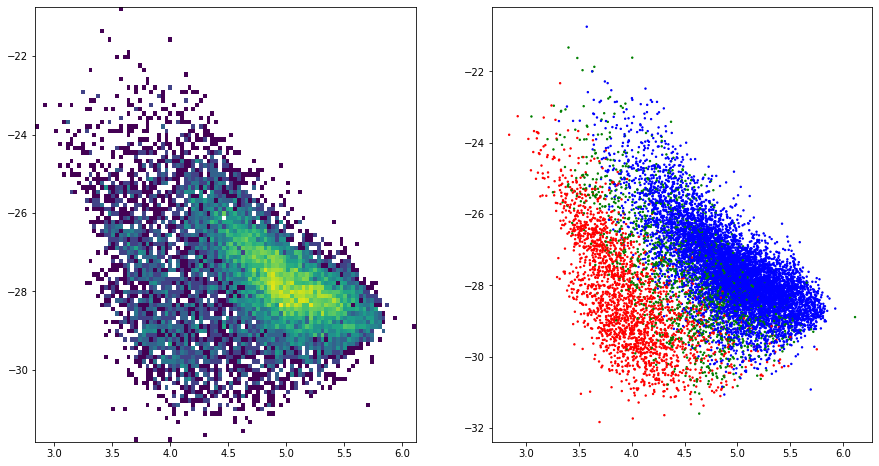

In [21]:
from matplotlib.colors import LogNorm
colors = {0:'red', 1:'green', 2:'blue'}
fig, ax=plt.subplots(1,2, figsize=(15,8))
ax[0].hist2d(P[:,0],P[:,1], bins=100, norm=LogNorm()) #vmax=30);
ax[1].scatter(P[:,0], P[:,1], c=Tab['type'].map(colors), s=2);

Voy a ver cómo afecta el redshift a este gráfico, sobre todo porque luego voy a usar ppal comps para los algoritmos y quizá sea conveniente hacer ventanas de redshift también. Voy a representar hasta z=1.7 porque luego los gráficos están básicamente vacíos.

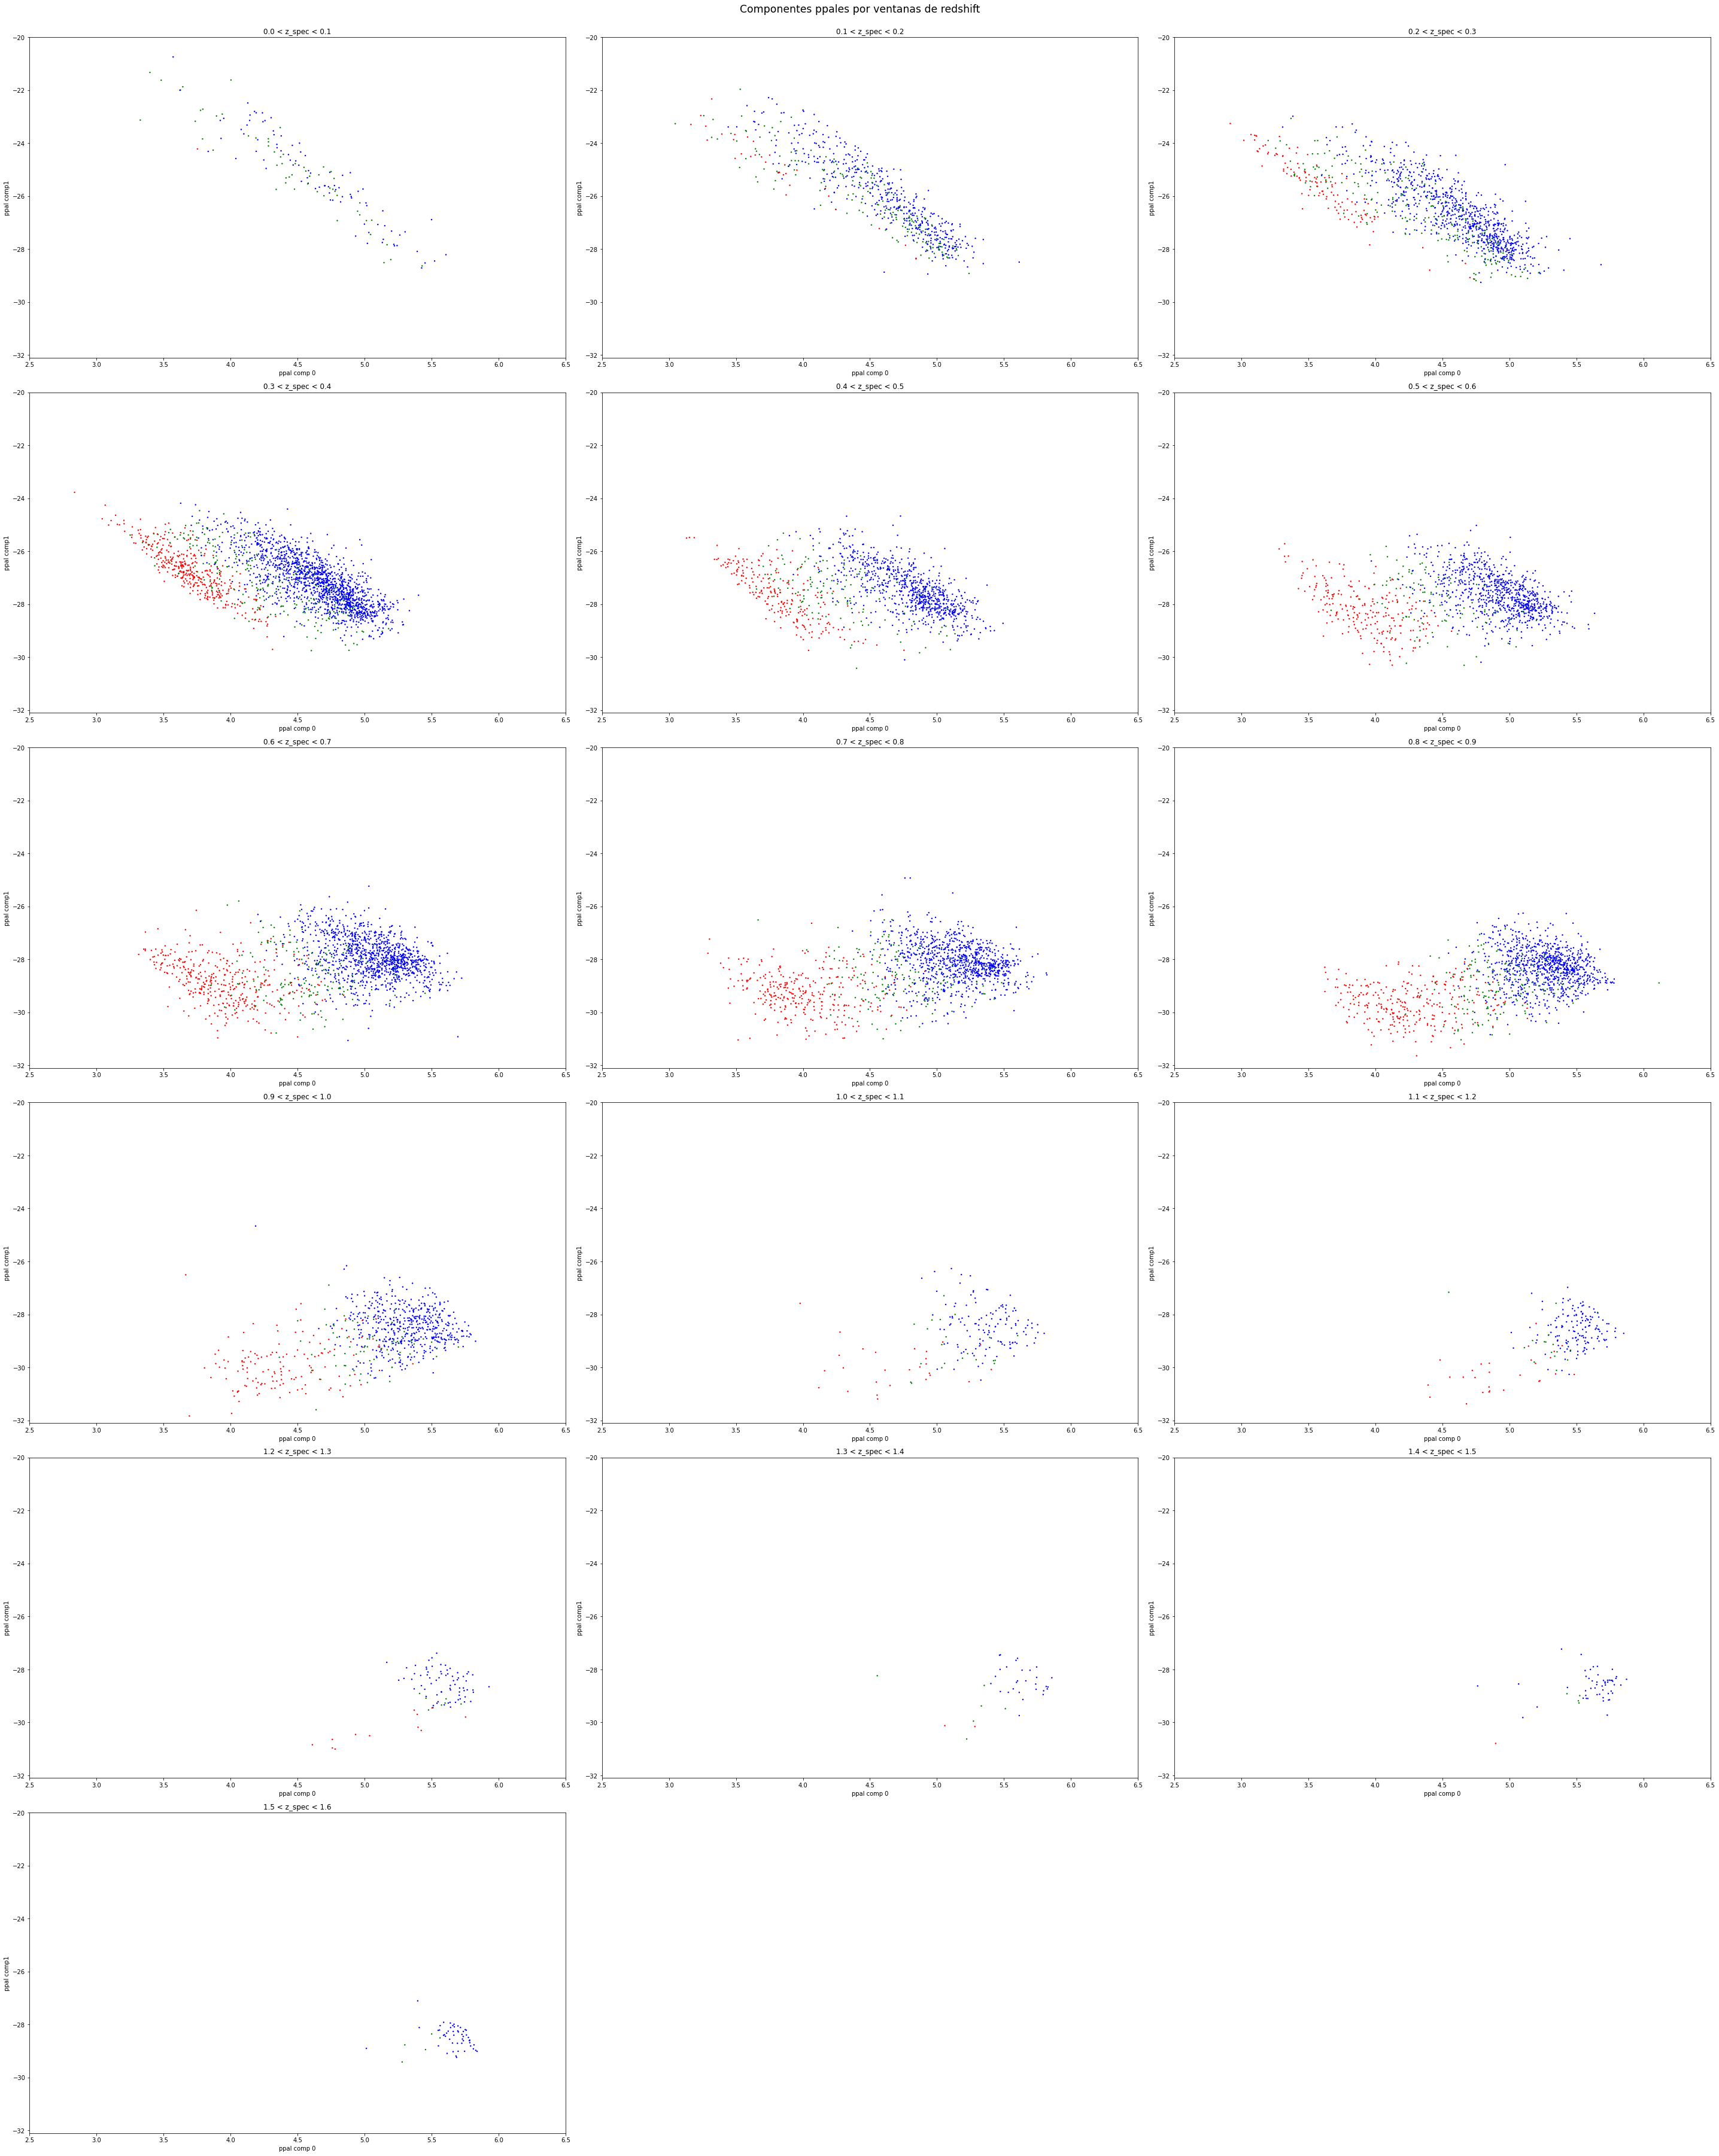

In [22]:
#Voy a representar las galaxias entre 0 y el máximo redshift zspec
z=np.arange(0,1.7,.1)
colors = {0:'red', 1:'green', 2:'blue'}
plt.figure(figsize=(40,50))
plt.suptitle('Componentes ppales por ventanas de redshift', size='xx-large', y=1)
for j in range(len(z)-1):
    X=Tab.loc[(Tab['zspec']>z[j])&(Tab['zspec']<z[j+1])]
    plt.subplot(6, 3, j+1)
    plt.scatter(X[0], X[1], color=X['type'].map(colors), s=2)
    plt.xlim([2.5,6.5])
    plt.ylim([-32.1, -20])
    plt.xlabel('ppal comp 0')
    plt.ylabel('ppal comp1') 
    plt.title('{} < z_spec < {}'.format(round(z[j],1),round(z[j+1],1)))
        
plt.tight_layout();

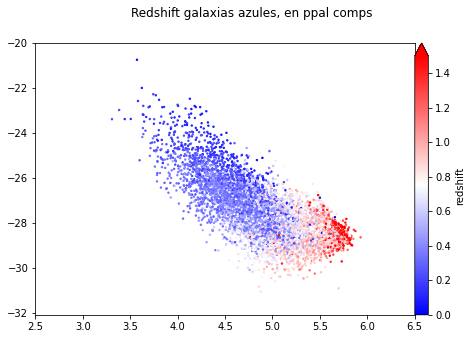

In [23]:
Bluegalaxies=Tab.loc[Tab['type']==2]
plt.figure(figsize=(8,5))
plt.scatter(Bluegalaxies[0], Bluegalaxies[1], c=Bluegalaxies['zspec'], cmap='bwr',s=2)
plt.clim(0,1.5)
plt.xlim([2.5,6.5])
plt.ylim([-32.1, -20])
plt.colorbar(location='right', pad=0.0001, label='redshift', extend='max')
plt.suptitle('Redshift galaxias azules, en ppal comps')
plt.savefig('Figuras para Latex/Componentes principales/Redshift analysis azules.png');
#Setting axis boundaries we left only one outlier galaxy out of the plot

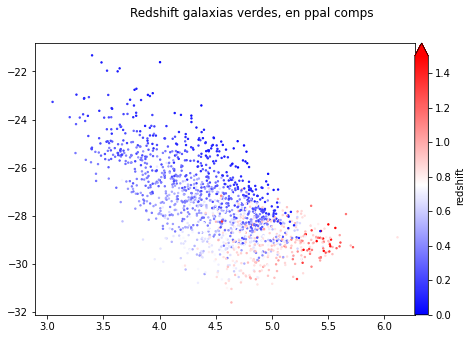

In [24]:
Greengalaxies=Tab.loc[Tab['type']==1]
plt.figure(figsize=(8, 5))
plt.scatter(Greengalaxies[0], Greengalaxies[1], c=Greengalaxies['zspec'], cmap='bwr',s=2)
#ax[1].set_xlim([2.5,6.5])
#ax[1].set_ylim([-32.1, -20])
plt.clim(0,1.5)
plt.colorbar(location='right', pad=0.0001, label='redshift', extend='max')
plt.suptitle('Redshift galaxias verdes, en ppal comps')
plt.savefig('Figuras para Latex/Componentes principales/Redshift analysis verdes.png');

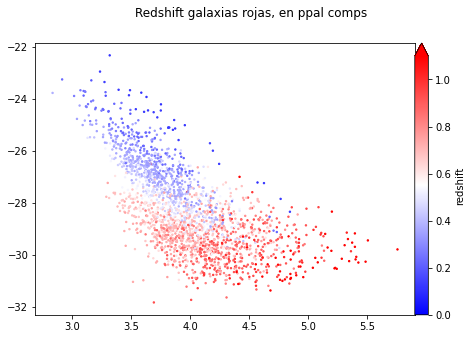

In [25]:
Redgalaxies=Tab.loc[Tab['type']==0]
plt.figure(figsize=(8, 5))
plt.scatter(Redgalaxies[0], Redgalaxies[1], c=Redgalaxies['zspec'], cmap='bwr',s=2)
#ax[1].set_xlim([2.5,6.5])
#ax[1].set_ylim([-32.1, -20])
plt.clim(0,1.1)#Porque las rojas están básicamente entre esos valores por encima de z=1 hay muy pocas galaxias rojas
plt.colorbar(location='right', pad=0.0001, label='redshift', extend='max')
plt.suptitle('Redshift galaxias rojas, en ppal comps')
plt.savefig('Figuras para Latex/Componentes principales/Redshift analysis rojas.png');

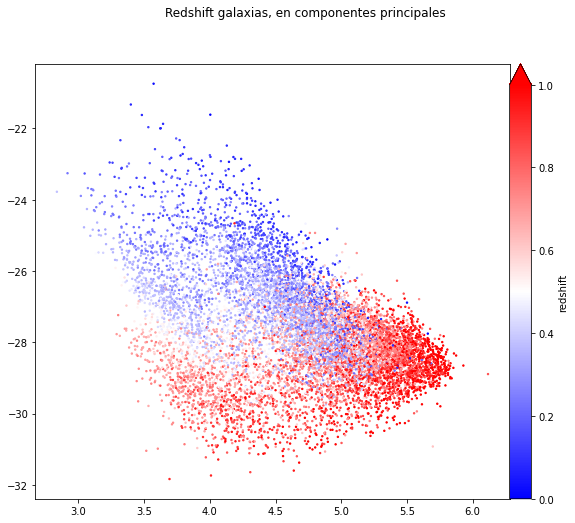

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(Tab[0], Tab[1], c=Tab['zspec'], cmap='bwr',s=2, vmin=0, vmax=1)
#plt.clim(0,1)
#plt.xlim([2.5,6.5])
#plt.ylim([-32.1, -20])
plt.colorbar(location='right', pad=0.0001, label='redshift', extend='max')
plt.suptitle('Redshift galaxias, en componentes principales')
plt.savefig('Figuras para Latex/Componentes principales/Redshift analysis bueno.png');

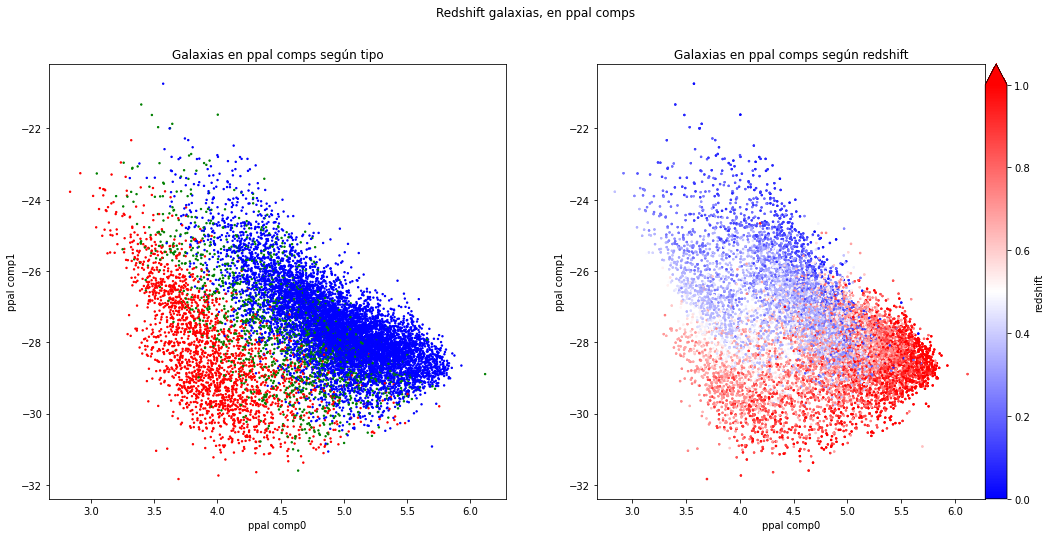

In [27]:
fig, ax=plt.subplots(1,2, figsize=(18,8))
colors = {0:'red', 1:'green', 2:'blue'}
ax[0].scatter(Tab[0], Tab[1], c=Tab['type'].map(colors), s=2)
ax[0].set_xlabel('ppal comp0')
ax[0].set_ylabel('ppal comp1')
ax[0].set_title('Galaxias en ppal comps según tipo')
ax[1].scatter(Tab[0], Tab[1], c=Tab['zspec'], cmap='bwr' ,s=2, vmin=0, vmax=1)
ax[1].set_xlabel('ppal comp0')
ax[1].set_ylabel('ppal comp1')
ax[1].set_title('Galaxias en ppal comps según redshift')
fig.colorbar(ax[1].scatter(Tab[0], Tab[1], c=Tab['zspec'], cmap='bwr' ,s=2,vmin=0, vmax=1) ,location='right', pad=0.0001, label='redshift', extend='max')
plt.suptitle('Redshift galaxias, en ppal comps')
plt.savefig('Figuras para Latex/Componentes principales/Redshift analysis vs tipos.png');

---
---
---
# Algoritmos no supervisados ML

Usaremos algoritmos de Machine Learning para clasificar las galaxias.

___
***
___

## DBScan
Vamos a probar la clasificación con el algortimo DBScan. 

- 1º voy a usar los colores consecutivos

Probamos a clasificar las galaxias solo en el intervalo de redshift 0.3-0.4 porque según los plots color-color en ese rango rojas y azules están muy pobladas.

In [28]:
from sklearn.cluster import DBSCAN

In [29]:
#Voy a usar la ventana redshift 0.3-0.4 porque en vista de los plots de color rojas y azules es denso
Tabm=Tab.loc[(Tab['zspec']>0.3)&(Tab['zspec']<0.4)]
redm=Tabm.loc[Tabm['type']==0]
greenm=Tabm.loc[Tabm['type']==1]
bluem=Tabm.loc[Tabm['type']==2]
dbsarray=Tabm[colores].to_numpy()

In [30]:
#Tabm[colores]

En DBSCAN hay que utilizar 2 parámetros. Primero el radio de los puntos núcleo. Después el número de vecinos que tiene que haber en cada radio. Para escoger el radio nos fijamos en el los diagramas color-color. Parece que 0.5 mag es un buen first guess. El número de vecinos parece más complicado de escoger, parece que en la elección de este parámetro hay un sesgo con la muestra en particular que tengamos. Hay más azules en particular, y en los diagramas están más juntas, coger un valor de densidad (vecinos) más alto favorece que se agrupen las azules pero solo porque hay más en nuestra muestra. Las rojas al ser menor número se verán como outliers. 

Usando los colores consecutivos, hay menos diferencias entre los tipos de galaxias. En esas 9 dimensiones las diferencias de colores son menores, y la **densidad** en ese espacio entre galaxias es parecida. Con DBSCAN es imporante que haya diferencias de densidad en el espacio de datos.

In [31]:
dbscan=DBSCAN(eps=.08, min_samples=5) #eps = radio de los puntos núcleo, min_samples = número de vecinos para ser punto núcleo

In [32]:
dbscan.fit(dbsarray)

DBSCAN(eps=0.08)

In [33]:
dbscan.labels_

array([ 0, -1, -1, ..., -1,  0, -1], dtype=int64)

In [34]:
Tabm['DBSType']=dbscan.labels_

C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\2261075644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabm['DBSType']=dbscan.labels_


(array([ 677.,    0.,    0., 1147.,    0.,    0.,    0.,  265.,    0.,
           0.,   37.,    0.,    0.,    0.,    5.,    0.,    0.,    5.]),
 array([-1.        , -0.72222222, -0.44444444, -0.16666667,  0.11111111,
         0.38888889,  0.66666667,  0.94444444,  1.22222222,  1.5       ,
         1.77777778,  2.05555556,  2.33333333,  2.61111111,  2.88888889,
         3.16666667,  3.44444444,  3.72222222,  4.        ]),
 <BarContainer object of 18 artists>)

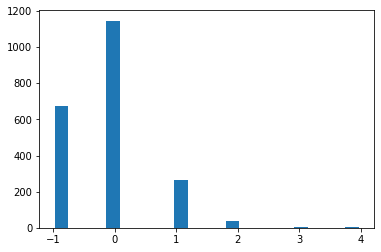

In [35]:
plt.hist(Tabm['DBSType'],align='mid', bins=18, rwidth=0.8)

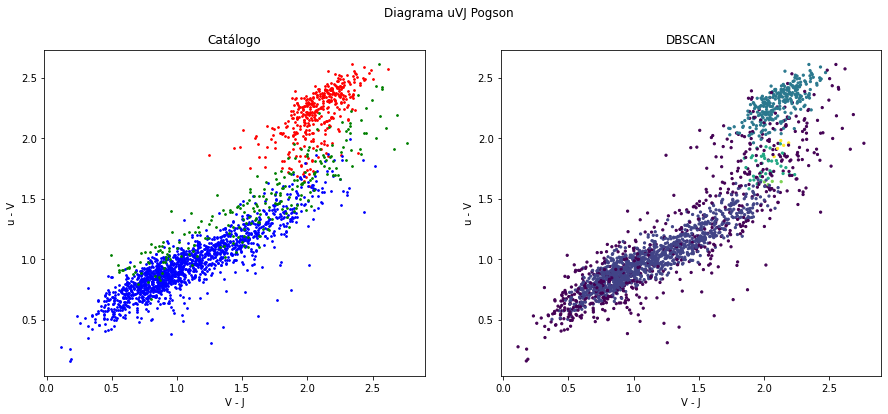

In [36]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax[0].scatter(-2.5*np.log10([redm['V/J']]), -2.5*np.log10([redm['u/V']]),color='r',s=3)
ax[0].scatter(-2.5*np.log10([bluem['V/J']]), -2.5*np.log10([bluem['u/V']]),color='b',s=3)
ax[0].scatter(-2.5*np.log10([greenm['V/J']]), -2.5*np.log10([greenm['u/V']]),color='g',s=3)
ax[0].set_title('Catálogo')
ax[0].set_xlabel('V - J')
ax[0].set_ylabel('u - V')


ax[1].scatter(-2.5*np.log10([Tabm['V/J']]), -2.5*np.log10([Tabm['u/V']]),c=Tabm.DBSType, s=5)

ax[1].set_title('DBSCAN')
ax[1].set_xlabel('V - J')
ax[1].set_ylabel('u - V')
fig.suptitle('Diagrama uVJ Pogson');
fig.savefig('Plots/DBSCAN Diagrama uVJ.png');

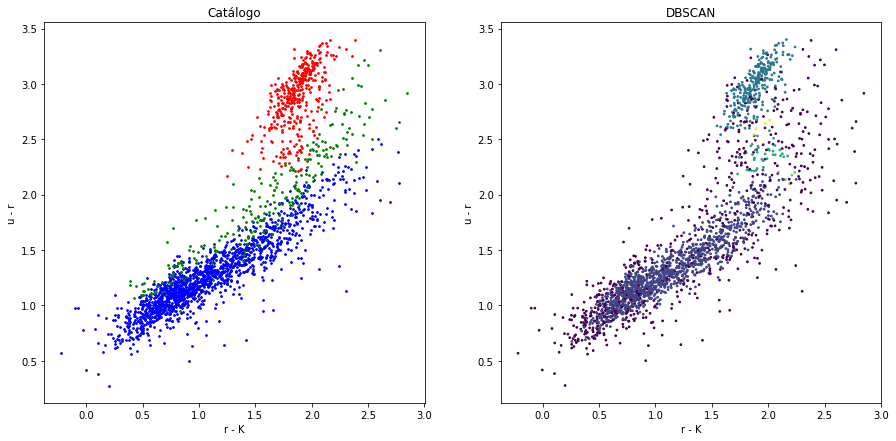

In [37]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
ax[0].scatter(-2.5*np.log10([redm['r/K']]), -2.5*np.log10([redm['u/r']]),color='r',s=3)
ax[0].scatter(-2.5*np.log10([bluem['r/K']]), -2.5*np.log10([bluem['u/r']]),color='b',s=3)
ax[0].scatter(-2.5*np.log10([greenm['r/K']]), -2.5*np.log10([greenm['u/r']]),color='g',s=3)
ax[0].set_title('Catálogo')
ax[0].set_xlabel('r - K')
ax[0].set_ylabel('u - r')

ax[1].scatter(-2.5*np.log10([Tabm['r/K']]), -2.5*np.log10([Tabm['u/r']]),c=Tabm.DBSType,s=3)
ax[1].set_title('DBSCAN')
ax[1].set_xlabel('r - K')
ax[1].set_ylabel('u - r')
import matplotlib as mp
plt.savefig('Figuras para Latex/No supervisados/DBSCAN/urkcoltest.png', bbox_inches=mp.transforms.Bbox.from_extents(0,0,7.5,7))
plt.savefig('Figuras para Latex/No supervisados/DBSCAN/urkcolpred.png', bbox_inches=mp.transforms.Bbox.from_extents(7.5,0,15,7));

## DBSCAN con componentes ppales

Probamos con el algoritmo DBScan y las componentes ppales

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
dbsarray=Tab[ppalcomps]
dbscan=DBSCAN(eps=0.115, min_samples=50)
dbscan.fit(dbsarray)
Tab['DBStype']=dbscan.labels_

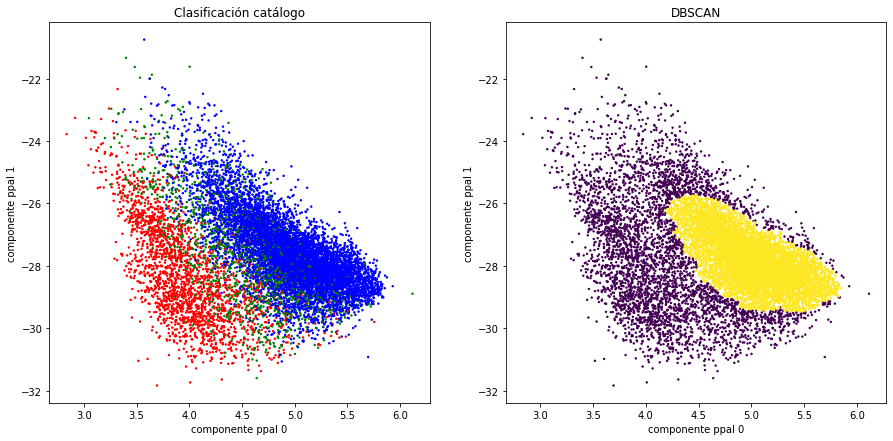

In [40]:
fig, ax=plt.subplots(1,2, figsize=(15,7))
colors = {0:'red', 1:'green', 2:'blue'}
ax[0].scatter(Tab[0], Tab[1], c=Tab['type'].map(colors), s=2)
ax[0].set_title('Clasificación catálogo')
ax[0].set_xlabel('componente ppal 0')
ax[0].set_ylabel('componente ppal 1')
ax[0].set_title('Clasificación catálogo')


ax[1].scatter(Tab[0], Tab[1], c=Tab['DBStype'], s=2)
ax[1].set_title('Clasificación DBScan')
ax[1].set_xlabel('componente ppal 0')
ax[1].set_ylabel('componente ppal 1')
ax[1].set_title('DBSCAN')

import matplotlib as mp
plt.savefig('Figuras para Latex/No supervisados/DBSCAN/DBSCANtest.png', bbox_inches=mp.transforms.Bbox.from_extents(0,0,7.5,7))
plt.savefig('Figuras para Latex/No supervisados/DBSCAN/DBSCANpred.png', bbox_inches=mp.transforms.Bbox.from_extents(7.5,0,15,7));

(array([4127.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 7986.]),
 array([-1.        , -0.94444444, -0.88888889, -0.83333333, -0.77777778,
        -0.72222222, -0.66666667, -0.61111111, -0.55555556, -0.5       ,
        -0.44444444, -0.38888889, -0.33333333, -0.27777778, -0.22222222,
        -0.16666667, -0.11111111, -0.05555556,  0.        ]),
 <BarContainer object of 18 artists>)

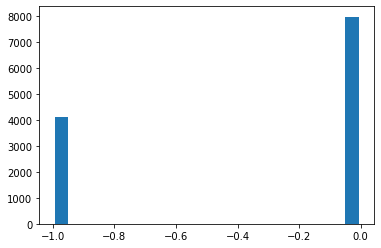

In [41]:
plt.hist(Tab['DBStype'],align='mid', bins=18, rwidth=0.8)

In [42]:
#for i in range(len(Tab)):
#    if Tab['type'][i]==0:
#        Tab['plotcolor']='red'    
#    if Tab['type'][i]==1:
#        Tab['plotcolor']='green'
#    if Tab['type'][i]==2:
#        Tab['plotcolor']='blue'

In [43]:
#K = range(1,10)
#for num_clusters in K :
 #   print(num_clusters)

___
***
___

## OPTICS
Algoritmo parecido a DBSCAN, pero permite extraer cluster de diferentes tamaños, densidades y formas.

Define a density threshold parameter, Eps, which controls the minimum density of clusters.
For each point in the dataset, calculate the distance to its k-nearest neighbors.
Starting with an arbitrary point, calculate the reachability distance of each point in the dataset, based on the density of its neighbors.
Order the points based on their reachability distance and create the reachability plot.
Extract clusters from the reachability plot by grouping points that are close to each other and have similar reachability distances

In [44]:
from sklearn.cluster import OPTICS

In [45]:
opticsarray=Tab[ppalcomps]
Optics=OPTICS(min_samples=50, max_eps=0.1)
Optics.fit(opticsarray)
Tab['Optics_type']=Optics.labels_

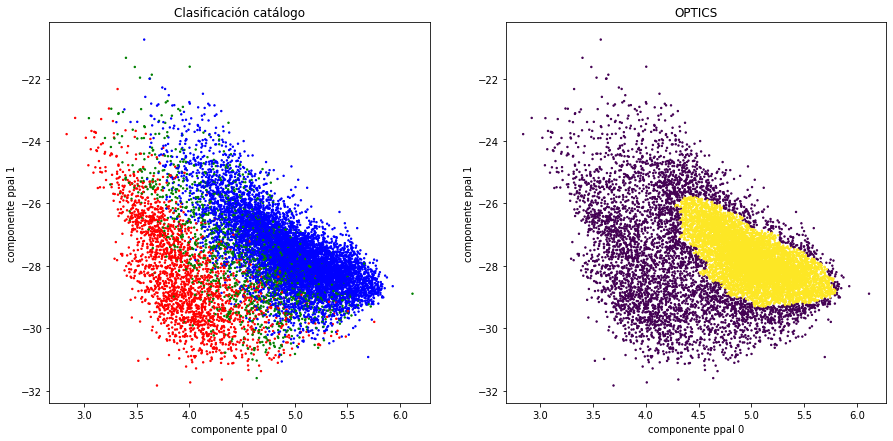

In [46]:
fig, ax=plt.subplots(1,2, figsize=(15,7))
colors = {0:'red', 1:'green', 2:'blue'}
ax[0].scatter(Tab[0], Tab[1], c=Tab['type'].map(colors), s=2)
ax[0].set_xlabel('componente ppal 0')
ax[0].set_ylabel('componente ppal 1')
ax[0].set_title('Clasificación catálogo')


ax[1].scatter(Tab[0], Tab[1], c=Tab['Optics_type'], s=2)
ax[1].set_xlabel('componente ppal 0')
ax[1].set_ylabel('componente ppal 1')
ax[1].set_title('OPTICS');

# import matplotlib as mp
# plt.savefig('Figuras para Latex/No supervisados/DBSCAN/DBSCANtest.png', bbox_inches=mp.transforms.Bbox.from_extents(0,0,7.5,7))
# plt.savefig('Figuras para Latex/No supervisados/DBSCAN/DBSCANpred.png', bbox_inches=mp.transforms.Bbox.from_extents(7.5,0,15,7));

Voy a prbar OPTICS con las magnitudes a ver si consigo algo mejor.

In [47]:
Optics.n_features_in_

2

In [48]:
Optics.labels_

array([-1, -1, -1, ...,  0, -1,  0])

In [49]:
help(filter)

Help on class filter in module builtins:

class filter(object)
 |  filter(function or None, iterable) --> filter object
 |  
 |  Return an iterator yielding those items of iterable for which function(item)
 |  is true. If function is None, return the items that are true.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [50]:
opticsarray=Tab[magnitudes]
Optics=OPTICS()#min_samples=3, max_eps=5)
Optics.fit(opticsarray)
Tab['Optics_type']=Optics.labels_

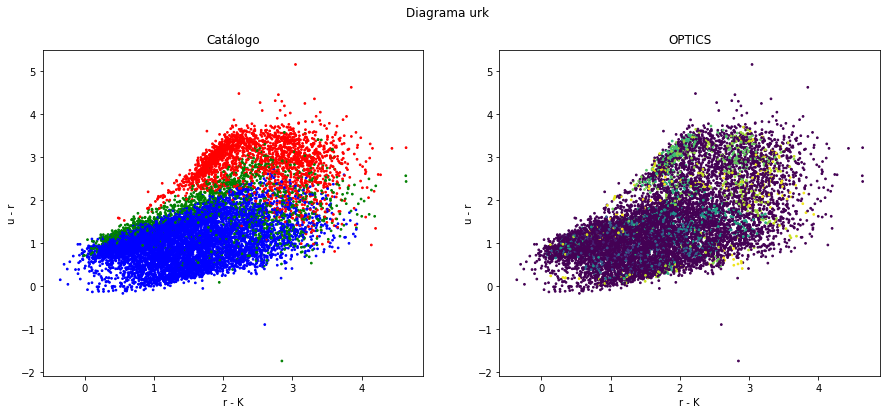

In [51]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

colors = {0:'red', 1:'green', 2:'blue'}
ax[0].scatter(Tab['m_r_Subaru']-Tab['m_K_uv'], Tab['m_u_cfht']-Tab['m_r_Subaru'], c=Tab['type'].map(colors),s=3)
ax[0].set_title('Catálogo')
ax[0].set_xlabel('r - K')
ax[0].set_ylabel('u - r')

ax[1].scatter(Tab['m_r_Subaru']-Tab['m_K_uv'], Tab['m_u_cfht']-Tab['m_r_Subaru'], c=Tab['Optics_type'],s=3)
ax[1].set_title('OPTICS')
ax[1].set_xlabel('r - K')
ax[1].set_ylabel('u - r')
fig.suptitle('Diagrama urk');

---
____
---

# Hierarchical clustering
## Agglomerative clustering

Empieza con todos los puntos siendo clusters independientes y los va agrupando. Hay diferentes criterios para como va uniendo los grupos: Ward, Maximum, Average, Single.

Vamos a probar:
- Probamos con las componentes ppales con las diferentes linkages y poniendo un valor umbral de distancia = 2, sin fijar número de clusters: single linkage no funciona, tiende a agrupar todas juntas, ward y max hacen grupos demasiado pequeños, average parace lo mejor pero está el problema
- Pruebo con linkage='average' por ventanas de redshift

In [52]:
from sklearn.cluster import AgglomerativeClustering
ACward=AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=0.5)
ACmax=AgglomerativeClustering(n_clusters=None, linkage='complete', distance_threshold=0.5)
ACav=AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=0.5)
ACsing=AgglomerativeClustering(n_clusters=None, linkage='single', distance_threshold=0.5)

In [53]:
ACward.fit(Tab[ppalcomps].to_numpy())
ACmax.fit(Tab[ppalcomps].to_numpy())
ACsing.fit(Tab[ppalcomps].to_numpy())
ACav.fit(Tab[ppalcomps].to_numpy());

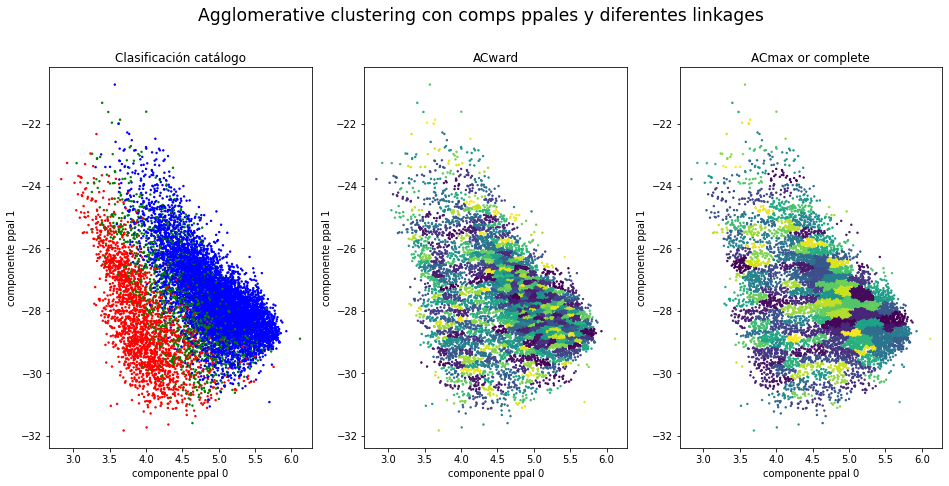

In [54]:
fig, ax=plt.subplots(1,3, figsize=(16,7))
colors = {0:'red', 1:'green', 2:'blue'}
ax[0].scatter(Tab[0], Tab[1], c=Tab['type'].map(colors), s=2)
ax[0].set_xlabel('componente ppal 0')
ax[0].set_ylabel('componente ppal 1')
ax[0].set_title('Clasificación catálogo')

ax[1].scatter(Tab[0], Tab[1], c=ACward.labels_, s=2)
ax[1].set_xlabel('componente ppal 0')
ax[1].set_ylabel('componente ppal 1')
ax[1].set_title('ACward')

ax[2].scatter(Tab[0], Tab[1], c=ACmax.labels_, s=2)
ax[2].set_xlabel('componente ppal 0')
ax[2].set_ylabel('componente ppal 1')
ax[2].set_title('ACmax or complete');

plt.suptitle('Agglomerative clustering con comps ppales y diferentes linkages', size='xx-large', y=1)

plt.savefig('Figuras para Latex/No supervisados/Agglomerative clustering/different linkages1.png');


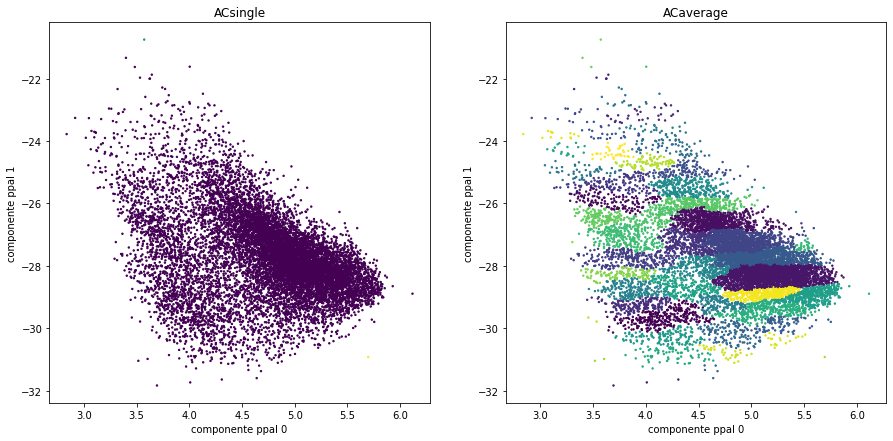

In [55]:
fig, ax=plt.subplots(1,2, figsize=(15,7))

ax[0].scatter(Tab[0], Tab[1], c=ACsing.labels_, s=2)
ax[0].set_xlabel('componente ppal 0')
ax[0].set_ylabel('componente ppal 1')
ax[0].set_title('ACsingle')

ax[1].scatter(Tab[0], Tab[1], c=ACav.labels_, s=2)
ax[1].set_xlabel('componente ppal 0')
ax[1].set_ylabel('componente ppal 1')
ax[1].set_title('ACaverage')

plt.savefig('Figuras para Latex/No supervisados/Agglomerative clustering/different linkages2.png');

## Prueba por ventanas de redshift de agglomerative clustering
Hasta redshift=1.7

In [56]:
from sklearn.cluster import AgglomerativeClustering 
z=np.arange(0,1.7,.1)
AC=AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=1)
# TABLA = pd.DataFrame([],columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas','pr. rojo', 'recall rojo','f1sc rojo', 'azules', 'KM azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
# TABLAsv = pd.DataFrame([],columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas','pr. rojo', 'recall rojo','f1sc rojo', 'azules', 'KM azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
binesward=[]#Lista donde vamos a ir guardando los dataframes de cada bin de redshift con la cladificación de AC.

for i in range(len(z)-1):
        X=Tab.loc[(Tab['zspec']>z[i])&(Tab['zspec']<z[i+1])]
        AC.fit(X[ppalcomps].to_numpy())
        #ahora va el dataFrame con las posiciones de los centroides, que hay que cambiar si cambian los inputs
        tipos = AC.labels_
        #centroides2 = pd.DataFrame(kmeans.cluster_centers_, columns=ppalcomps) #dataframe con posición de los 2 centroides
        #Ahora en vista de los gráficos las rojas tienen menor componente 0 
#         if centroides2.iloc[0][0]>centroides2.iloc[1][0]: #esto es que las tipo 0 del algortimo serán las azules
#             #hay que cambiar los 0 por 2 y los 1 por 0
#             for h in range(len(tipos)):
#                 if tipos[h]==0:
#                     tipos[h]=2
#                     continue
#                 if tipos[h]==1:
#                     tipos[h]=0
                    
#         if centroides2.iloc[0][0]<centroides2.iloc[1][0]:#esto es que las tipo 0 del algoritmo son las rojas
#             for j in range(len(tipos)):
#                 if tipos[j]==1:
#                     tipos[j]=2 
                    
#         matrix=confusion_matrix(X['type'],tipos)
#         report=classification_report(X['type'],tipos, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)
#         fila = [str(round(z[i],1))+'-'+str(round(z[i+1],1)), sum(sum(confusion_matrix(X['type'],tipos))) ,report['accuracy'],
#                              report['rojo']['support'],matrix[0,0]+matrix[1,0]+matrix[2,0],report['rojo']['precision'], report['rojo']['recall'],report['rojo']['f1-score'],
#                             report['azul']['support'],matrix[2,2]+matrix[1,2]+matrix[0,2],report['azul']['precision'], report['azul']['recall'],report['azul']['f1-score']]
#             #columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'KM azules' ,'pr azul', 'recall azul', 'f1sc azul'])
#         TABLA.loc[len(TABLA.index)] = fila
        
        #Ahora tabla sin verdes
        #Ahora quiero eliminar las verdes del análisis. Elimino del data frame las que son verdes
        X['tipos']=tipos #columna añadida a data frame X con clasif AC de momento no sé cuantos tipos habrá
        binesward.append(X)
#         Xsv=X[X.type != 1]
#         matrix=confusion_matrix(Xsv['type'],Xsv['tipos'])
#         report=classification_report(Xsv['type'],Xsv['tipos'], output_dict=True, target_names=['rojo','azul'], zero_division=0)
#         fila = [str(round(z[i],1))+'-'+str(round(z[i+1],1)), sum(sum(matrix)) ,report['accuracy'],
#                              report['rojo']['support'],matrix[0,0]+matrix[1,0],report['rojo']['precision'], report['rojo']['recall'],report['rojo']['f1-score'],
#                             report['azul']['support'],matrix[1,1]+matrix[0,1],report['azul']['precision'], report['azul']['recall'],report['azul']['f1-score']]
#             #columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'KM azules' ,'pr azul', 'recall azul', 'f1sc azul'])
#         TABLAsv.loc[len(TABLAsv.index)] = fila

C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\701607740.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tipos']=tipos #columna añadida a data frame X con clasif AC de momento no sé cuantos tipos habrá
C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\701607740.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tipos']=tipos #columna añadida a data frame X con clasif AC de momento no sé cuantos tipos habrá
C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\701607740.py:39: SettingWithCopyW

In [57]:
# colors = {0:'red', 1:'green', 2:'blue'}
# fig, ax=plt.subplots(1,2, figsize=(15,8))
# ax[0].scatter(Tab[0], Tab[1], c=Tab['type'].map(colors), s=2)
# ax[0].set_title('Clasificación catálogo')
# for i in range(len(bines)):
#     ax[1].scatter(bines[i][0], bines[i][1], s=2)#c=bines[i]['tipos'].map(colors), s=2)
    
# ax[1].set_title('Clasificación AC con comp ppales en vtnas redshift')

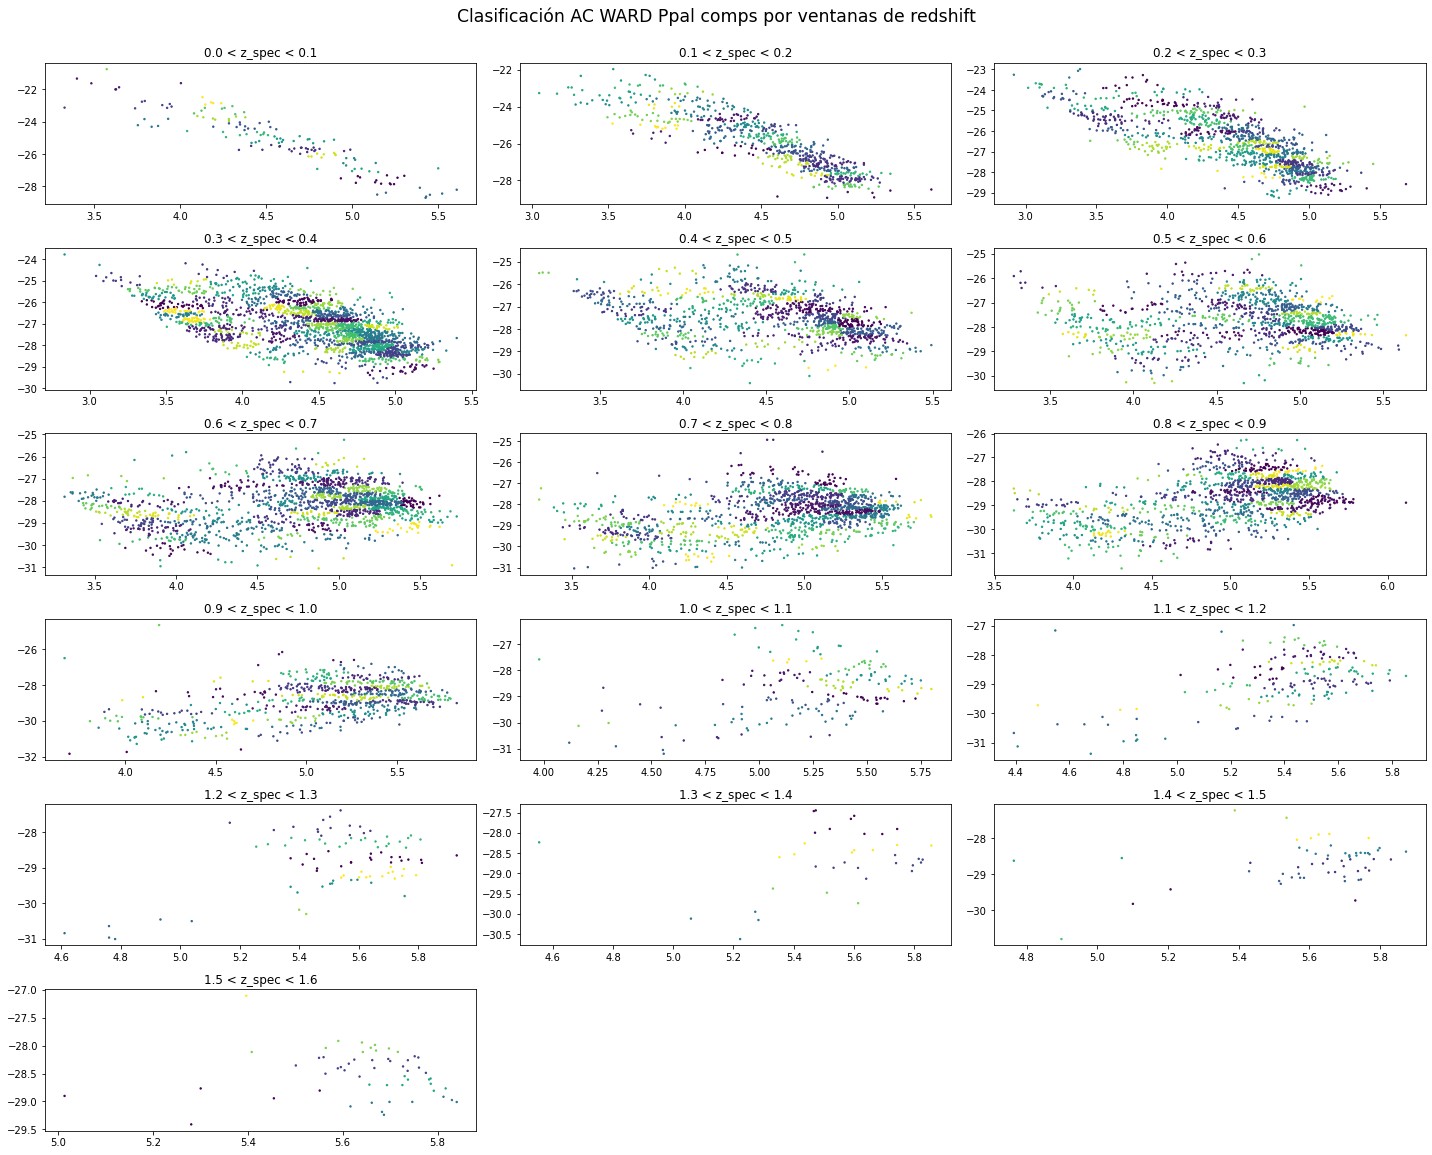

In [58]:
z=np.arange(0,1.7,.1)
colors = {0:'red', 1:'green', 2:'blue'}
plt.figure(figsize=(20,16))
plt.suptitle('Clasificación AC WARD Ppal comps por ventanas de redshift', size='xx-large', y=1)
for i in range(len(binesward)):
    plt.subplot(6, 3, i+1)
    plt.scatter(binesward[i][0], binesward[i][1], c=binesward[i]['tipos'], s=2)
    #plt.scatter(X[0], X[1], c=X['type'].map(colors), s=2)
    plt.title('{} < z_spec < {}'.format(round(z[i],1),round(z[i+1],1)))
        
plt.tight_layout();

In [59]:
from sklearn.cluster import AgglomerativeClustering 
z=np.arange(0,1.7,.1)
AC=AgglomerativeClustering(n_clusters=None, linkage='complete', distance_threshold=1)
binescomp=[]#Lista donde vamos a ir guardando los dataframes de cada bin de redshift con la cladificación de AC.

for i in range(len(z)-1):
        X=Tab.loc[(Tab['zspec']>z[i])&(Tab['zspec']<z[i+1])]
        AC.fit(X[ppalcomps].to_numpy())
        tipos = AC.labels_
        X['tipos']=tipos #columna añadida a data frame X con clasif AC de momento no sé cuantos tipos habrá
        binescomp.append(X)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\2586925880.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tipos']=tipos #columna añadida a data frame X con clasif AC de momento no sé cuantos tipos habrá
C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\2586925880.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tipos']=tipos #columna añadida a data frame X con clasif AC de momento no sé cuantos tipos habrá
C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\2586925880.py:10: SettingWithCo

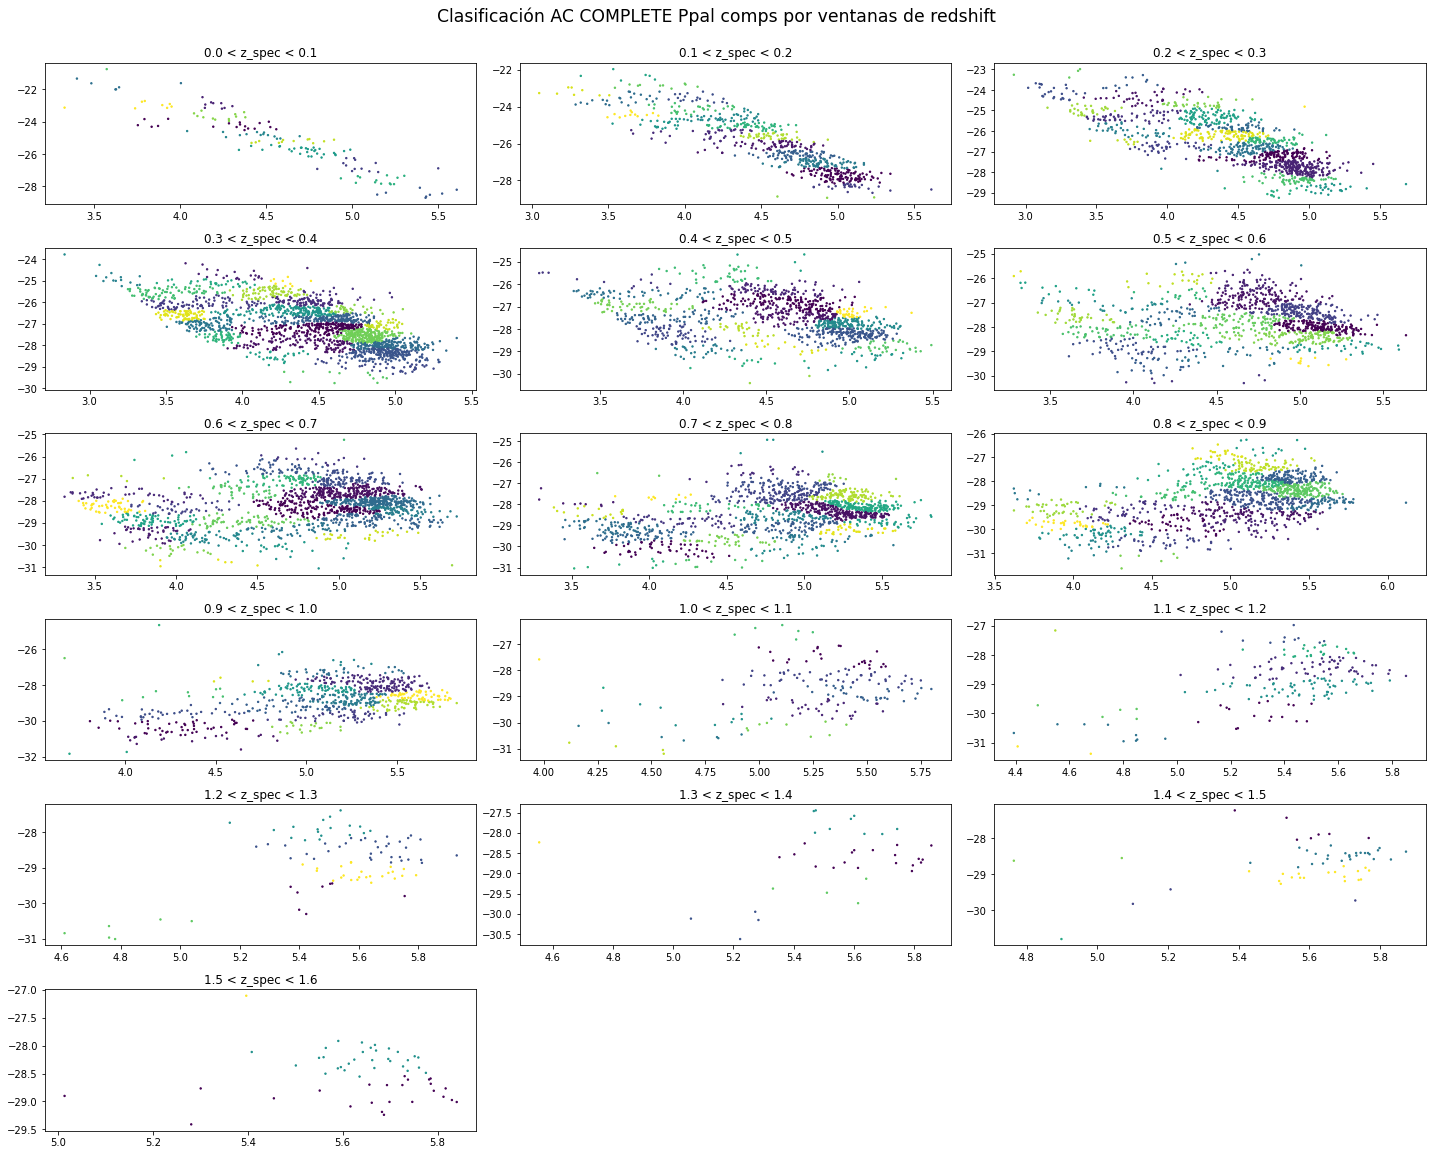

In [60]:
z=np.arange(0,1.7,.1)
colors = {0:'red', 1:'green', 2:'blue'}
plt.figure(figsize=(20,16))
plt.suptitle('Clasificación AC COMPLETE Ppal comps por ventanas de redshift', size='xx-large', y=1)
for i in range(len(binescomp)):
    plt.subplot(6, 3, i+1)
    plt.scatter(binescomp[i][0], binescomp[i][1], c=binescomp[i]['tipos'], s=2)
    #plt.scatter(X[0], X[1], c=X['type'].map(colors), s=2)
    plt.title('{} < z_spec < {}'.format(round(z[i],1),round(z[i+1],1)))
        
plt.tight_layout();

In [61]:
from sklearn.cluster import AgglomerativeClustering 
z=np.arange(0,1.7,.1)
AC=AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=1)
binesav=[]#Lista donde vamos a ir guardando los dataframes de cada bin de redshift con la cladificación de AC.

for i in range(len(z)-1):
        X=Tab.loc[(Tab['zspec']>z[i])&(Tab['zspec']<z[i+1])]
        AC.fit(X[ppalcomps].to_numpy())
        tipos = AC.labels_
        X['tipos']=tipos #columna añadida a data frame X con clasif AC de momento no sé cuantos tipos habrá
        binesav.append(X)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\3145047152.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tipos']=tipos #columna añadida a data frame X con clasif AC de momento no sé cuantos tipos habrá
C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\3145047152.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tipos']=tipos #columna añadida a data frame X con clasif AC de momento no sé cuantos tipos habrá
C:\Users\Daniel\AppData\Local\Temp\ipykernel_18260\3145047152.py:10: SettingWithCo

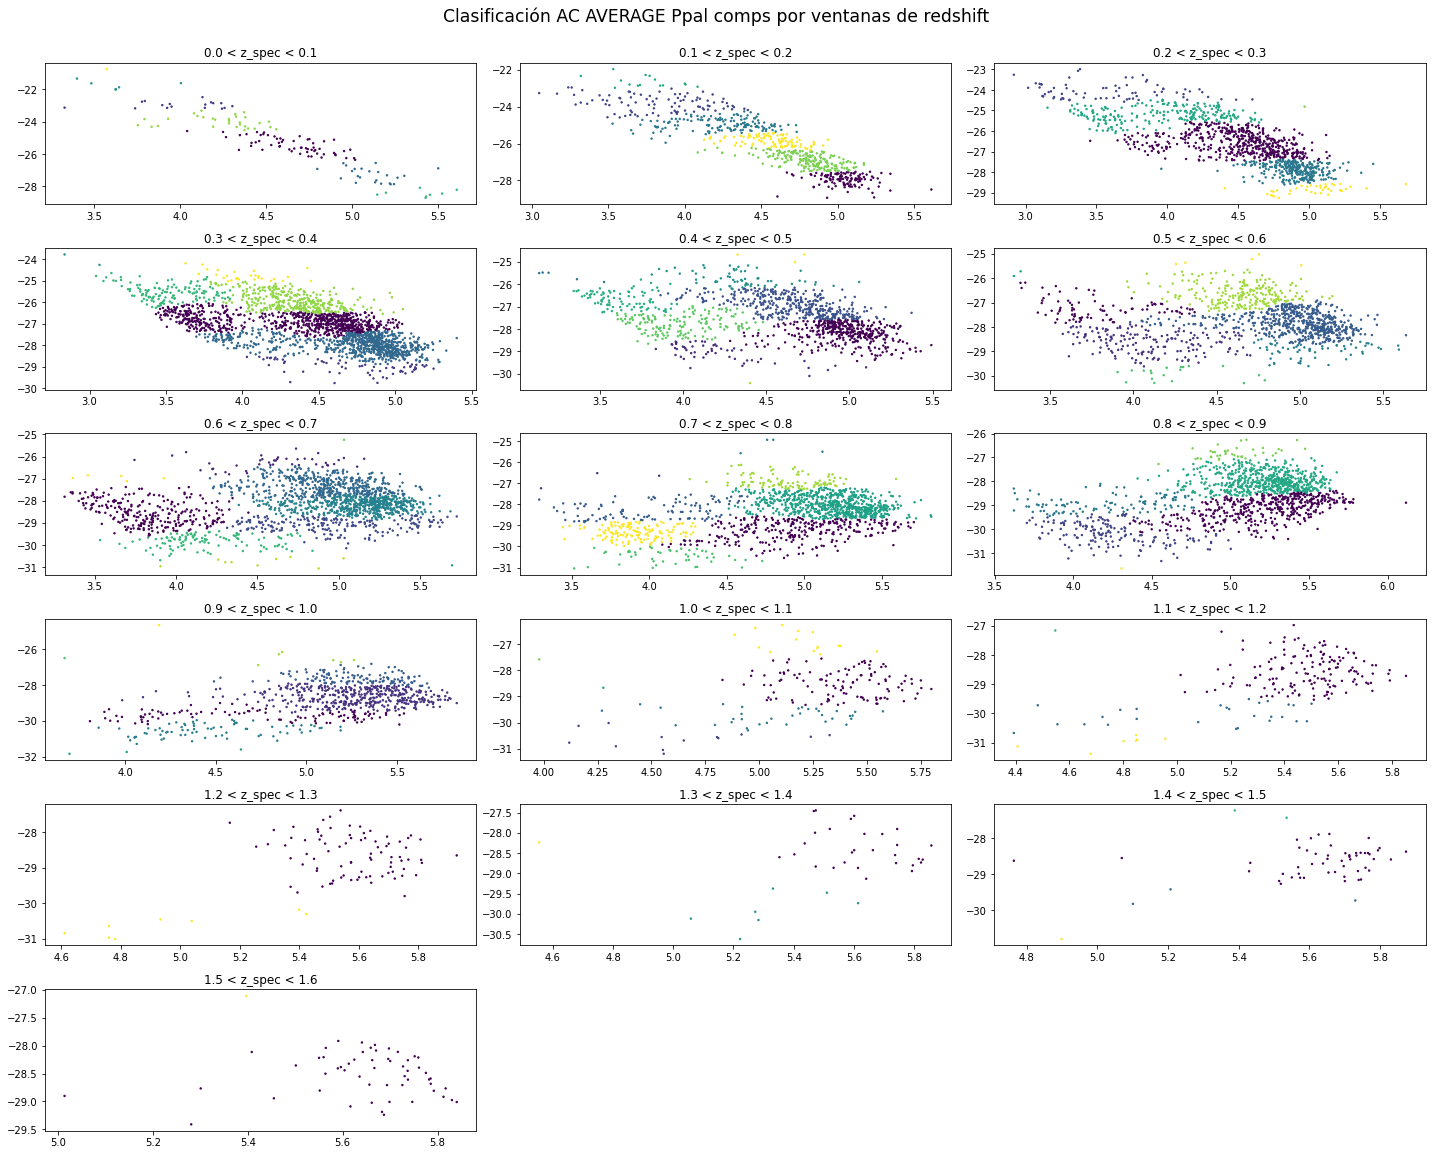

In [62]:
z=np.arange(0,1.7,.1)
colors = {0:'red', 1:'green', 2:'blue'}
plt.figure(figsize=(20,16))
plt.suptitle('Clasificación AC AVERAGE Ppal comps por ventanas de redshift', size='xx-large', y=1)
for i in range(len(binesav)):
    plt.subplot(6, 3, i+1)
    plt.scatter(binesav[i][0], binesav[i][1], c=binesav[i]['tipos'], s=2)
    #plt.scatter(X[0], X[1], c=X['type'].map(colors), s=2)
    plt.title('{} < z_spec < {}'.format(round(z[i],1),round(z[i+1],1)))
        
plt.tight_layout();

___
***
___

# Affinity propagation algorithm

Voy a probar con este otro algoritmo no supervisado, que también se puede usar a través de scikit learn. De entrada probaré con las magnitudes y toda la muestra a la vez, para ver rápidamente si puede funcionar bien o no.


In [63]:
Tab[magnitudes]

m_u_cfht  m_B_Subaru  m_V_Subaru  m_r_Subaru  m_i_Subaru  \
0      22.928679   22.324074   21.713651   20.990942   20.325008   
1      21.811980   20.885876   19.549214   19.122280   18.602434   
2      22.707770   22.761947   22.681971   22.364661   21.787727   
3      21.711525   21.585085   20.998429   20.771962   20.650277   
4      24.191150   24.137852   23.785692   23.349074   22.407606   
...          ...         ...         ...         ...         ...   
12108  22.148709   22.001913   21.335046   21.039228   20.881345   
12109  22.482160   22.352510   21.729849   21.412600   21.186612   
12110  23.836356   23.820151   23.572623   23.373692   22.730631   
12111  23.895685   24.078303   23.922817   23.720273   23.060157   
12112  22.907815   22.570726   21.931798   21.660254   21.524985   

       m_suprime_FDCCD_z     m_Y_uv     m_J_uv     m_H_uv     m_K_uv  
0              19.918392  19.727191  19.467156  19.042987  18.796103  
1              18.294497  18.089135  17.752083  17.516818  17.399786  
2              22.383147  21.867179  22.220564  22.102670  22.297836  
3              20.436990  20.435621  20.283513  20.191344  20.090657  
4              21.875217  21.666035  21.305032  20.999595  20.705534  
...                  ...        ...        ...        ...        ...  
12108          20.655862  20.627623  20.455734  20.329540  20.242919  
12109          20.927324  20.911642  20.699974  20.477303  20.347146  
12110          22.434747  22.323557  22.007195  22.010798  21.778409  
12111          22.676771  22.648711  22.238681  22.265945  22.241645  
12112          21.345017  21.452580  21.289092  21.199364  21.120305  

[12113 rows x 10 columns]

In [ ]:
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation().fit(Tab[magnitudes].to_numpy())

In [ ]:
af.labels_

In [ ]:
len(af.cluster_centers_indices_)

In [ ]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

colors = {0:'red', 1:'green', 2:'blue'}
ax[0].scatter(Tab['m_r_Subaru']-Tab['m_K_uv'], Tab['m_u_cfht']-Tab['m_r_Subaru'], c=Tab['type'].map(colors),s=3)
ax[0].set_title('Catálogo')
ax[0].set_xlabel('r - K')
ax[0].set_ylabel('u - r')

ax[1].scatter(Tab['m_r_Subaru']-Tab['m_K_uv'], Tab['m_u_cfht']-Tab['m_r_Subaru'], c=af.labels_,s=3)
ax[1].set_title('AffinityPropagation')
ax[1].set_xlabel('r - K')
ax[1].set_ylabel('u - r')
fig.suptitle('Diagrama urk');

Voy a probar en una ventana de redshift concreta porque salen muchos clusters

In [ ]:
Tabm=Tab.loc[(Tab['zspec']>0.55)&(Tab['zspec']<0.6)]
af = AffinityPropagation().fit(Tabm[magnitudes].to_numpy())
print('número de clusters', len(af.cluster_centers_indices_))

In [ ]:
Tabm.shape

In [ ]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

colors = {0:'red', 1:'green', 2:'blue'}
ax[0].scatter(Tabm['m_r_Subaru']-Tabm['m_K_uv'], Tabm['m_u_cfht']-Tabm['m_r_Subaru'], c=Tabm['type'].map(colors),s=3)
ax[0].set_title('Catálogo')
ax[0].set_xlabel('r - K')
ax[0].set_ylabel('u - r')

ax[1].scatter(Tabm['m_r_Subaru']-Tabm['m_K_uv'], Tabm['m_u_cfht']-Tabm['m_r_Subaru'], c=af.labels_, s=3)
ax[1].set_title('AffinityPropagation')
ax[1].set_xlabel('r - K')
ax[1].set_ylabel('u - r')
fig.suptitle('Diagrama urk');

Tengo que explorar el input _preference_ en el que puntuamos cada galaxia como posible ejemplar y centro de cluster.

# Spectral clustering

1. Lo probamos con toda la muestra a la vez, usando assign_labels='kmeans' ya que no funciona con 'cluster_qr'. Al pedir 3 clusters + de 10000 galaxias son asignadas a un solo grupo FATAL.

2. En vista de lo anterior pruebo con una ventana de redshift.

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
Tabm=Tab.loc[(Tab['zspec']>0.55)&(Tab['zspec']<0.6)]

In [ ]:
sp = SpectralClustering(n_clusters=3).fit(Tabm[magnitudes].to_numpy())

In [ ]:
labels = pd.DataFrame(sp.labels_)

In [ ]:
labels.hist()

In [ ]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

colors = {0:'red', 1:'green', 2:'blue'}
ax[0].scatter(Tabm['m_r_Subaru']-Tabm['m_K_uv'], Tabm['m_u_cfht']-Tabm['m_r_Subaru'], c=Tabm['type'].map(colors),s=3)
ax[0].set_title('Catálogo')
ax[0].set_xlabel('r - K')
ax[0].set_ylabel('u - r')

ax[1].scatter(Tabm['m_r_Subaru']-Tabm['m_K_uv'], Tabm['m_u_cfht']-Tabm['m_r_Subaru'], c=labels[0].map(colors), s=3)
ax[1].set_title('Spectral Clustering')
ax[1].set_xlabel('r - K')
ax[1].set_ylabel('u - r')
fig.suptitle('Diagrama urk');

In [ ]:
Tabm=Tab.loc[(Tab['zspec']>0.55)&(Tab['zspec']<0.6)]
sp = SpectralClustering(assign_labels='cluster_qr').fit(Tabm[magnitudes].to_numpy())
labels = pd.DataFrame(sp.labels_)
labels.hist()

---
___
---